In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datassist import explore

In [2]:
df_titanic = pd.read_csv('data/train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic = df_titanic.set_index('PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_titanic.shape

(891, 11)

In [6]:
explore.overview(df_titanic)

,NULL Count,NULL %,Unique Items,Type
Survived,0,0.0,2,int64
Pclass,0,0.0,3,int64
Name,0,0.0,891,object
Sex,0,0.0,2,object
Age,177,19.9,88,float64
SibSp,0,0.0,7,int64
Parch,0,0.0,7,int64
Ticket,0,0.0,681,object
Fare,0,0.0,248,float64
Cabin,687,77.1,147,object


In [7]:
explore.basic_stats(df_titanic)

,Pclass,Age,SibSp,Parch,Fare
count,891.0,714.0,891.0,891.0,891.0
mean,2.3,29.7,0.5,0.4,32.2
std,0.8,14.5,1.1,0.8,49.7
min,1.0,0.4,0.0,0.0,0.0
25%,2.0,20.1,0.0,0.0,7.9
50%,3.0,28.0,0.0,0.0,14.5
75%,3.0,38.0,1.0,0.0,31.0
max,3.0,80.0,8.0,6.0,512.3
median,3.0,28.0,0.0,0.0,14.5
mode,3.0,24.0,0.0,0.0,8.0


In [8]:
explore.count_outliers(df_titanic)

,index,Number of Outliers
0,Survived,0
1,Pclass,0
2,Age,2
3,SibSp,30
4,Parch,15
5,Fare,20


In [9]:
def plot_histogram_by_class(df: pd.DataFrame, column: str, class_column: str) -> None:
    sns.histplot(data=df, x=column, hue=class_column, multiple="stack", shrink=.8)

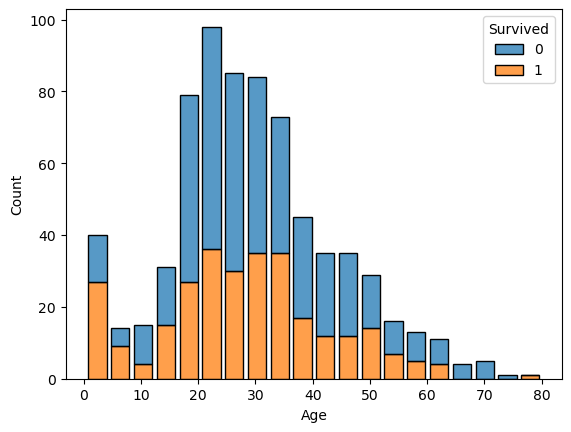

In [10]:
plot_histogram_by_class(df_titanic, 'Age', 'Survived')

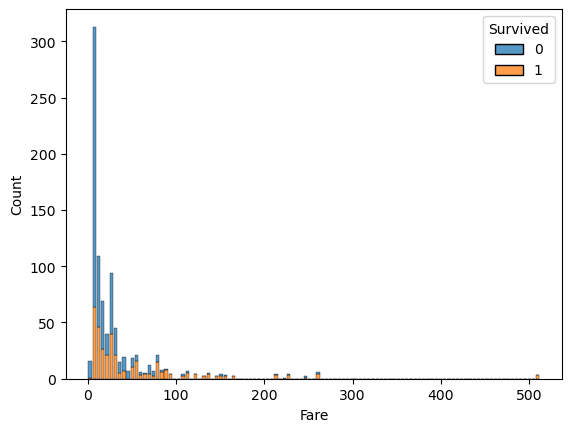

In [11]:
plot_histogram_by_class(df_titanic, 'Fare', 'Survived')

In [12]:
def plot_bar_by_class(df: pd.DataFrame, col: str, class_col: str, title: str) -> None:
    df_grouped = df.groupby([col, class_col]).count()
    count = df_grouped.columns[0] # choose the first column as the count
    sns.barplot(
        df_grouped.reset_index(),
        x=col,
        y=count, 
        hue=class_col
    ).set(ylabel='Count', title=title)

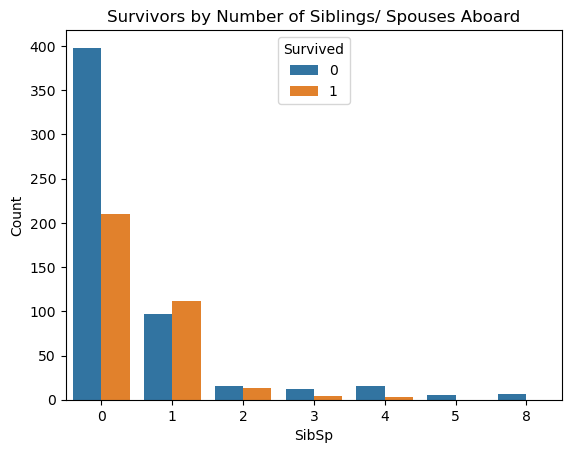

In [13]:
plot_bar_by_class(df_titanic, 'SibSp', 'Survived', 'Survivors by Number of Siblings/ Spouses Aboard')

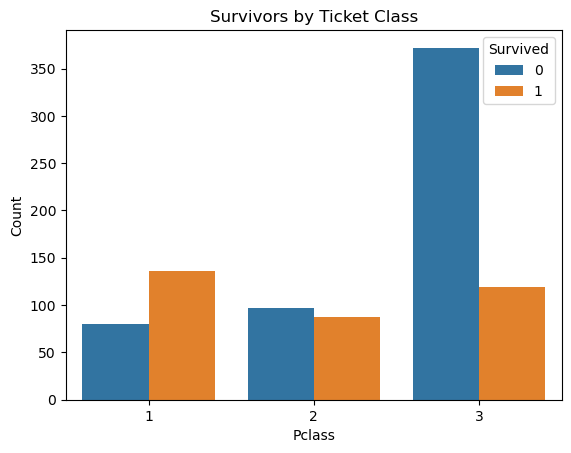

In [14]:
plot_bar_by_class(df_titanic, 'Pclass', 'Survived', 'Survivors by Ticket Class')

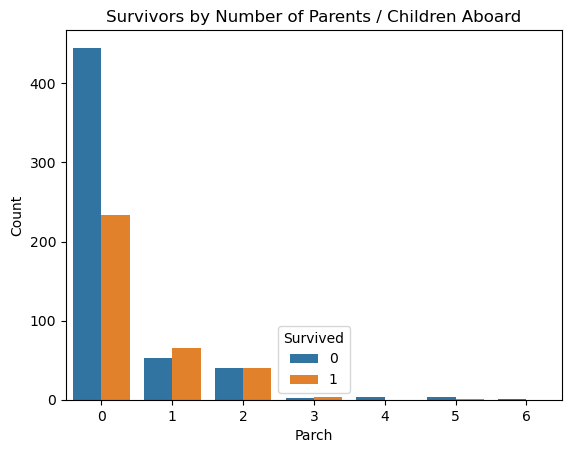

In [15]:
plot_bar_by_class(df_titanic, 'Parch', 'Survived', 'Survivors by Number of Parents / Children Aboard')